# **Evaluate Models and Algorithms**

In [78]:
import os
import sys
sys.path.append('/Users/damienmellot/desktop/MLE/Projects/fml/stock-price-prediction/')

import warnings
warnings.filterwarnings('ignore')

import src.settings.base as stg
from src.infrastructure.datasetcreation import DataFrameBuilder
from src.domain.datatransformation import DatasetTransformer

import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [101]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

In [103]:
dfb = DataFrameBuilder(stg.MSFT_R21_data)
df = dfb.data
X = dfb.features
Y = dfb.target

In [104]:
validation_size = 0.2
train_size = int(len(X) * (1 - validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [105]:
models = []

### Regression and Tree Regression algorithms

models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

### Neural Network algorithms

models.append(('MLP', MLPRegressor()))

### Ensemble models

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [106]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [107]:
names = []
kfold_results = []
test_results = []
train_results =[]
r2_results =[]
for name, model in models:
    names.append(name)
    
    ## k-fold analysis
    kfold = KFold(n_splits=num_folds)
    
    ## converted mean squared error to positive. The lower the better.
    cv_results = -1*cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    
    ## Full training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train) , Y_train)
    train_results.append(train_result)
    
    ## Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    ## R2 score
    r2_result = r2_score(Y_test, res.predict(X_test))
    r2_results.append(r2_result)
    
    msg1 = f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)}) Train MSE: {round(train_result, 5)} Test MSE: {round(test_result, 5)}'
    msg2 = f'{name}: {r2_result}'
    print(msg1)
    print(msg2)
    print('')

LR: 0.00044 (0.00012) Train MSE: 0.00044 Test MSE: 0.00081
LR: 0.8201506313626095

LASSO: 0.00297 (0.00144) Train MSE: 0.00295 Test MSE: 0.0048
LASSO: -0.06498605466179752

EN: 0.00297 (0.00144) Train MSE: 0.00295 Test MSE: 0.0048
EN: -0.06498605466179752

KNN: 0.00095 (0.00034) Train MSE: 0.00039 Test MSE: 0.00211
KNN: 0.5308771114662467

CART: 0.00097 (0.00021) Train MSE: 0.0 Test MSE: 0.00164
CART: 0.6356591094678844

SVR: 0.00148 (0.00082) Train MSE: 0.00121 Test MSE: 0.00322
SVR: 0.28399772294737147

MLP: 0.00068 (0.00028) Train MSE: 0.00053 Test MSE: 0.00126
MLP: 0.7201990813478456

ABR: 0.00058 (0.00015) Train MSE: 0.00046 Test MSE: 0.00126
ABR: 0.7208140273050407

GBR: 0.00048 (0.00012) Train MSE: 0.00031 Test MSE: 0.00134
GBR: 0.7028723172399518

RFR: 0.0005 (0.00012) Train MSE: 7e-05 Test MSE: 0.00114
RFR: 0.747732658260246

ETR: 0.0005 (0.00014) Train MSE: 0.0 Test MSE: 0.00118
ETR: 0.7378393139835737



## Cross-validation results

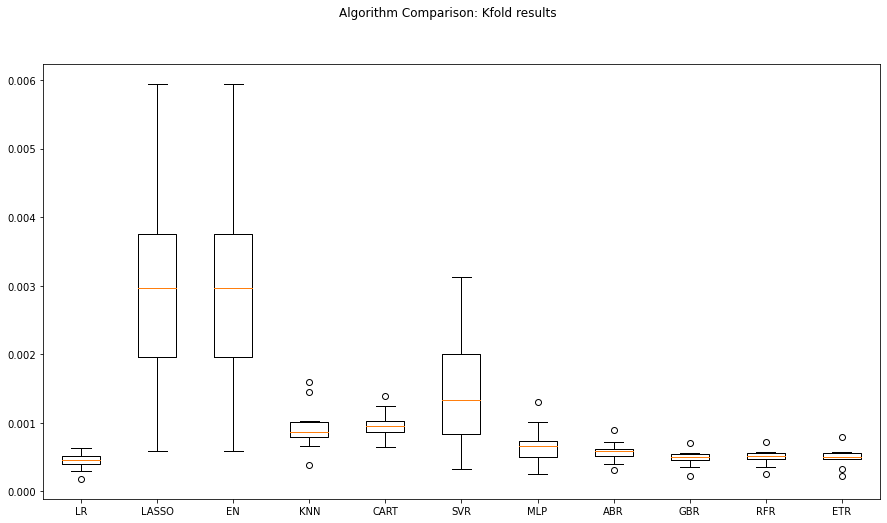

In [108]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

## Training and Test results

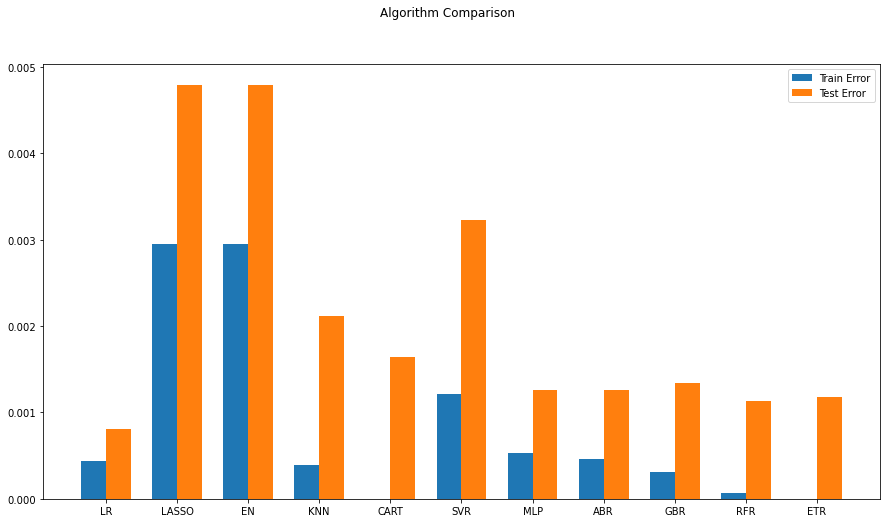

In [109]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results, width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

## R2 Score

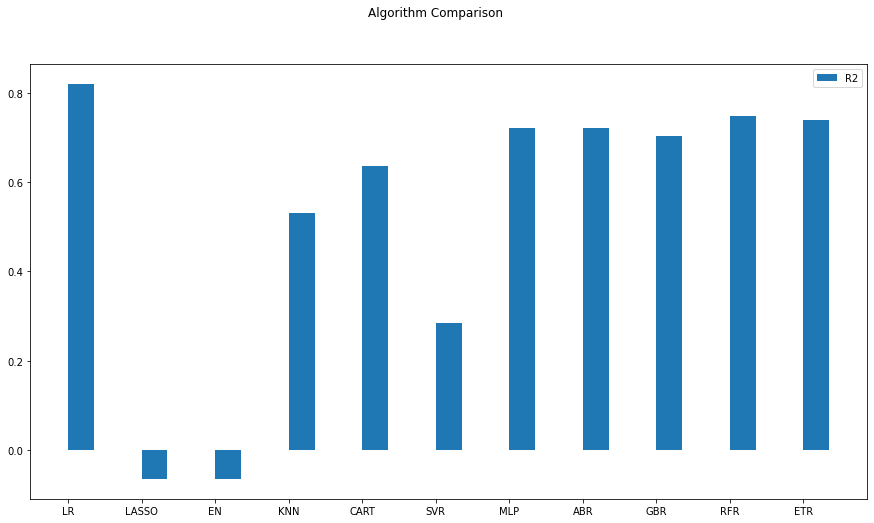

In [110]:
# compare algorithms R2
fig = plt.figure()

ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind + width/2, r2_results, width=width, label='R2')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

## Time series-based models: ARIMA and LSTM

#### ARIMA : Autoregressive integrated moving average

In [111]:
X_train_ARIMA = X_train.loc[:, [stg.MSFT_lagged, stg.GOOGL_lagged, stg.IBM_lagged, 
                                stg.DEXJPUS_lagged, stg.DEXUSUK_lagged, 
                                stg.SP500_lagged, stg.DJIA_lagged, stg.VIXCLS_lagged]]
X_test_ARIMA = X_test.loc[:, [stg.MSFT_lagged, stg.GOOGL_lagged, stg.IBM_lagged, 
                              stg.DEXJPUS_lagged, stg.DEXUSUK_lagged, 
                              stg.SP500_lagged, stg.DJIA_lagged, stg.VIXCLS_lagged]]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)

modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=[1,0,0])
model_fit = modelARIMA.fit()

error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
r2_ARIMA = r2_score(Y_test, predicted)

#### LSTM: Long short-term memory

In [91]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len - 1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0] + 1 - seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))

for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i : X_train.shape[0] + i + 1 - seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0] + i - 1 : X.shape[0] + i + 1 - seq_len, :]

In [92]:
def create_LSTMmodel(learn_rate = 0.01, momentum = 0):
    
    # Create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    
    # More cells can be added if needed
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    
    return model

LSTM_model = create_LSTMmodel(learn_rate=0.01, momentum=0)
LSTM_model_fit = LSTM_model.fit(X_train_LSTM, 
                                Y_train_LSTM, 
                                validation_data=(X_test_LSTM, Y_test_LSTM),
                                epochs=330,
                                batch_size=72,
                                verbose=0,
                                shuffle=False)

In [93]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTM_model.predict(X_train_LSTM))
predicted = LSTM_model.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test, predicted)
r2_LSTM = r2_score(Y_test, predicted)

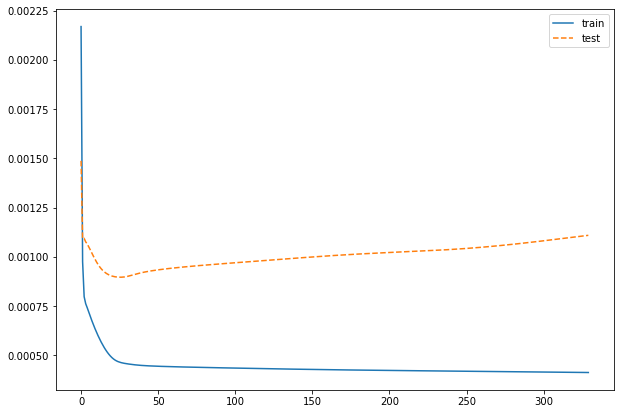

In [94]:
# Change in the model performance metric over time (train and test)

plt.figure(figsize=(10,7)) 
plt.plot(LSTM_model_fit.history['loss'], label='train')
plt.plot(LSTM_model_fit.history['val_loss'], '--', label='test')
plt.legend()
plt.show()

#### Append to previous results

In [95]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)
train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)
r2_results.append(r2_ARIMA)
r2_results.append(r2_LSTM)
names.append("ARIMA")
names.append("LSTM")

## Overall Comparison of all the algorithms ( including Time Series Algorithms)

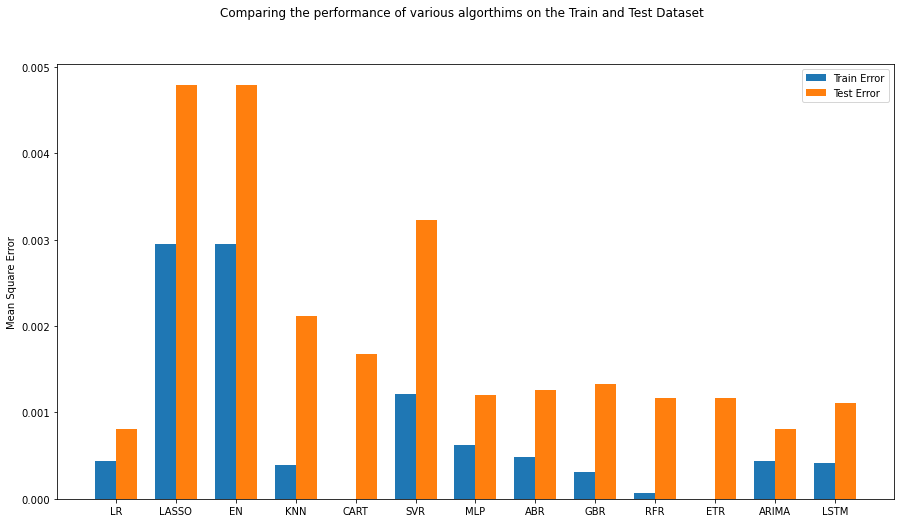

In [96]:
# compare algorithms Train - Test Error
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylabel('Mean Square Error')
plt.show()

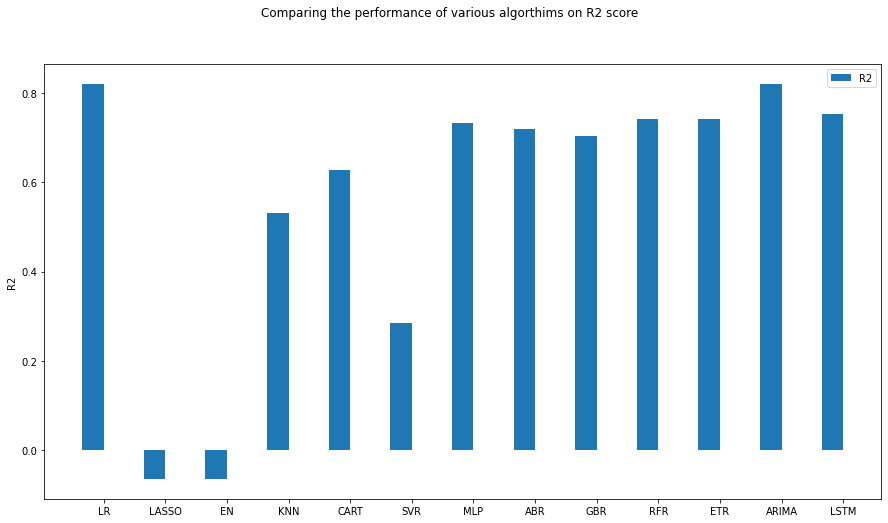

In [99]:
# compare algorithms R2 score
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on R2 score')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, r2_results,  width=width, label='R2')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylabel('R2')
plt.show()